# Logistic Regresyon

Buradan sonra bağımşı değişkenimiz ketegoric. bağımlı değişkenin sürekli olduğu durumlarsa regesyon 

süreksiz olduğu durumlarda sınıflandırma kullanıyorız

Amaç snıflandırma problemi için bağımlı ve bağımsız değişkne arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır

sonucun 0-1 arasında olmasının garanti eder

* Bağımlı değişken kategoriktir

* adını bağımlı değişkne uygulanan logit dönüşümünden alır

* Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnaktir

* Bağımlı değişkenin bir olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. 
Dolayısıyla bağımlı değişkenşn alacağı değerlerle ilgilenilmez. yani bağımlı değişkneşn 1 yada 0
olmasıyla değil 1 yada 0 olma olasılığıyla ilgilenirizz.

* Logistic fonk ile üretilen değerler 0-1 aralığında olur

Not: hocam veriyi hangi fonksiyona benzetebileceğimize inanıyorsak ona göre bir algoritma kullanırız. 
mesala linear doğrusal artan monoton bir yapı varsa linear regression mantıklı. eğer s eğrisi gibiyse
mesala öğrenme sürece önce durgun sonra hızlanır daha  sonra tekrat yavaşlar. o zamn logistic regresyon kullanırız.
sezonsal dönemsel artışlar varsa sinius fonksşyonuna benzatabiliriz vb. veriyi inceleyeip yapıya göre fonk algoeitma seçilir  

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
diabetes=pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: >

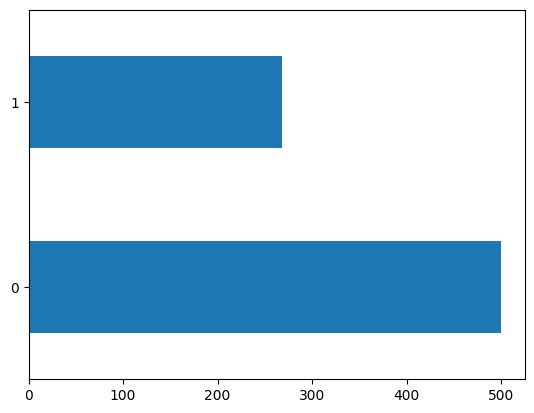

In [6]:
df["Outcome"].value_counts().plot.barh()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# stat model

In [8]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
log=sm.Logit(y,X)
log.fit().summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.05922
Time:                        22:11:40   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

# scikit learn

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log=LogisticRegression(solver="liblinear")
log_model=log.fit(X,y)
log_model

LogisticRegression(solver='liblinear')

In [11]:
log_model.intercept_#sabite ulaştık

array([-5.88792748])

In [12]:
log_model.coef_#tüm katsayılar

array([[ 1.17055282e-01,  2.83773988e-02, -1.68959127e-02,
         7.55949680e-04, -6.41814789e-04,  5.97256431e-02,
         6.76750038e-01,  7.22715216e-03]])

# Tahmin &  Tuning

In [13]:
# daha başlamadan önce sınıflandırmanın doğru yapılığp yapılmasığını kontrol etmekte fayda vardır. 
# genelde nadir olan sınıfa odaklanılır ve bu sınıf 1 olur. 
# kanserli olup olmamam durumu kanseer olmama, krediti ödeyip ödeyemem durumu ödeyememe

hocam logistik regresyonda tuning yok aslında model doğrulama yapıcaz

In [14]:
y_pred=log_model.predict(X)
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [15]:
accuracy_score(y,y_pred)

0.7747395833333334

In [16]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [17]:
y_pred[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [18]:
log_model.predict_proba(X)[0:10]
#buradaki değerler 0-1 olma olasılıkları
#mesala satır 1 de birinci değerin 0 olma ihtimali indis=0 da yani 0.35
#1 olma ihtimali indis=1 de 0.64 o zamn birinci tahmin 1 olu :))


array([[0.35053845, 0.64946155],
       [0.91695821, 0.08304179],
       [0.224803  , 0.775197  ],
       [0.92130994, 0.07869006],
       [0.16747233, 0.83252767],
       [0.798887  , 0.201113  ],
       [0.88007859, 0.11992141],
       [0.27795799, 0.72204201],
       [0.3206194 , 0.6793806 ],
       [0.92265973, 0.07734027]])

In [19]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [20]:
#şimdi bu predict_proba ile olaılık değerleri üzerinden bir eşik değer koyarak 0-1 snıflarına atamayı manual olarak yapalım
y_proba=log_model.predict_proba(X)
y_proba=y_proba[:,1]

In [21]:
y_pred=[1 if i>0.5 else 0 for i in y_proba]
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [22]:
#yeni pred yaptık doğrulama işlemlerine tekrara bakalım

In [23]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [24]:
accuracy_score(y,y_pred)#doğruluk oranı 

0.7747395833333334

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



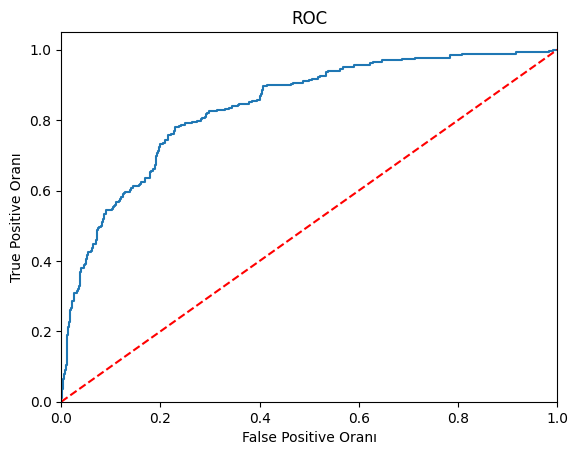

In [26]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

#grafikte iki çizgi var. kirmizi çizgi hiç bir  modelleme yapıkmasaydı rastgele 0-1 atansaydı elde edilecek olan başarı
#üsstekş mavi eğri ize modelmizin başarısı. o zaman eğrimiz kırmızı çizgiden ne kadar farklı o kadar iyi.

#auc (area under curve) eğrinin altınd akalan alan bize modelşmşz başarısını verecek

# Model Doğrulama

In [28]:
# logistic regresyonda tuning kısmı yok direkt model doğruşayacağız. ancak yukarıda test train ayırmadan tüm data set üzerinden
# modeli kurduk doğruladık bu pek sağlıklı değil şimdi güzelce train ile  modeli krup tesr hatamıza bakalım
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
log=LogisticRegression()
log_model=log.fit(X_train,y_train)
accuracy_score(y_test,log_model.predict(X_test))

0.7291666666666666

In [31]:
# en doğru sonuç valide edilmiş score(cross validation) ile elde edilir
# paramas=model, uygulanmak isteneen bağımsız değişkenker, tahmşnş karşılaştırmak istediğimiz bağımlı değişken değerleri, cross validation sayısı

cross_val_score(log_model,X_test,y_test,cv=10).mean()

0.745